In [1]:
import pandas as pd

# Creating a dictionary from the dataset
data = {
    'Cities': ['Seattle', 'New Orleans', 'Fort Lauderdale', 'NY'],
    'Sunday': [18, 8, 16, 15],
    'Monday': [18, 5, 12, 14],
    'Tuesday': [13, 8, 14, 11],
    'Wednesday': [9, 4, 12, 8],
    'Thursday': [10, 8, 13, 8],
    'Friday': [15, 5, 13, 16],
    'Saturday': [11, 12, 15, 12]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df.set_index('Cities', inplace=True)


ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

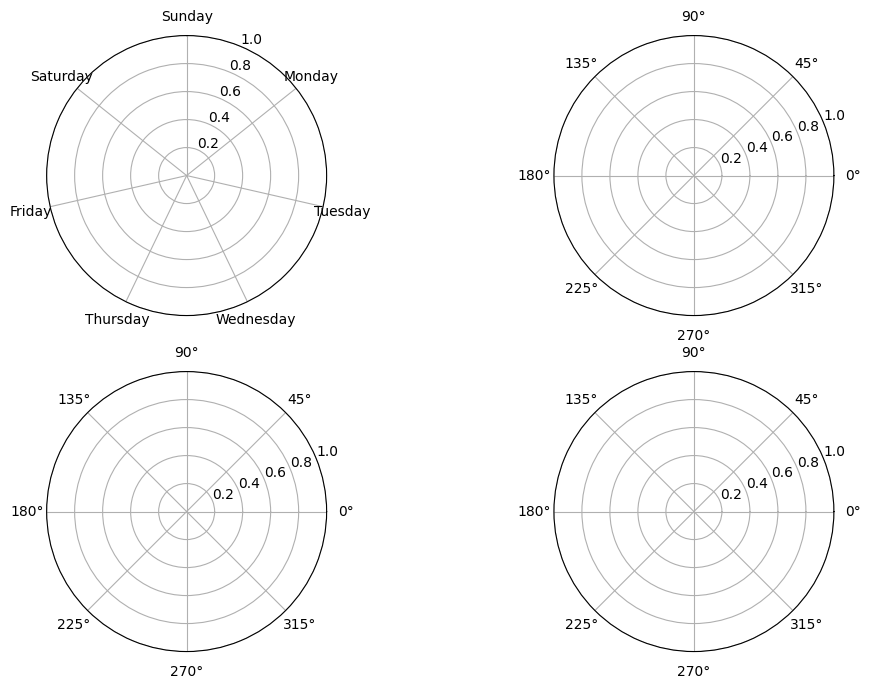

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create a polar chart for a single city
def create_polar_chart(ax, city_data, city_name):
    # Number of days
    num_vars = len(city_data)

    # Compute angle each bar is centered on:
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is made circular by appending a copy of the first value to the end.
    city_data += city_data[:1]
    angles += angles[:1]

    # Draw the plot
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=city_data.index.tolist())

    # Draw one axe per variable and add labels
    ax.plot(angles, city_data, color='blue', linewidth=2, linestyle='solid')
    
    # Fill color
    ax.fill(angles, city_data, color='blue', alpha=0.25)

    # Highlight the weekends in a different color
    weekend_angles = [angles[df.columns.get_loc(day)] for day in ['Sunday', 'Saturday']]
    weekend_data = [city_data[df.columns.get_loc(day) + 1] for day in ['Sunday', 'Saturday']]
    weekend_angles += weekend_angles[:1]  # complete the loop
    weekend_data += weekend_data[:1]  # complete the loop
    ax.plot(weekend_angles, weekend_data, color='red', linewidth=2, linestyle='solid')
    ax.fill(weekend_angles, weekend_data, color='red', alpha=0.5)

    # Set title
    ax.set_title(city_name)

# Number of variables we're plotting.
num_vars = len(df.columns)

# Create a figure and an array of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(polar=True), figsize=(12, 8))

# Flatten the array of axes, which makes them easier to iterate through and manage
axes = axes.flatten()

# Go through each city and create a polar chart
for ax, (city_name, city_data) in zip(axes, df.iterrows()):
    create_polar_chart(ax, city_data, city_name)

# Tight layout to maximize space usage
fig.tight_layout()

# Display the plot
plt.show()


In [4]:
import pandas as pd
import altair as alt


rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Assuming rainy_data is already loaded into a DataFrame
# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Create the plot
chart = alt.Chart(rainy_data_long).mark_bar().encode(
    x=alt.X('Days:N', sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], title='Day of the Week'),
    y=alt.Y('Rainfall:Q', title='Rainfall (mm)'),
    color='City:N',
    column='City:N', # Creates a separate plot for each city
    tooltip=['Days', 'City', 'Rainfall'] # Shows tooltip on hover
).properties(
    title='Rainfall by City on Different Days of the Week'
).configure_view(
    strokeOpacity=0 # Removes the border around each bar to mimic the theme_void() in ggplot
)

# Display the plot
chart


alt.Chart(...)

In [7]:
import pandas as pd
import altair as alt

# Load your dataset
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Assuming rainy_data is already loaded into a DataFrame
# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Create the plot with hues of purple for the cities
chart = alt.Chart(rainy_data_long).mark_bar().encode(
    x=alt.X('Days:N', sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], title='Day of the Week'),
    y=alt.Y('Rainfall:Q', title='Rainfall (mm)'),
    color=alt.Color('City:N', scale=alt.Scale(scheme='purples')),  # Apply a purple color scheme
    column='City:N',  # Creates a separate plot for each city
    tooltip=['Days', 'City', 'Rainfall']  # Shows tooltip on hover
).properties(
    title='Rainfall by City on Different Days of the Week'
).configure_view(
    strokeOpacity=0  # Removes the border around each bar to mimic the theme_void() in ggplot
)

# Display the plot
chart



alt.Chart(...)

In [8]:
import pandas as pd
import altair as alt
import numpy as np

# Load your dataset
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Normalize the 'Days' to a numeric value for the theta encoding
days_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
rainy_data_long['Day_Num'] = rainy_data_long['Days'].apply(lambda x: days_order[x])

# Calculate the maximum radius to ensure all bars fit within the chart
max_rainfall = rainy_data_long['Rainfall'].max()
max_radius = np.ceil(max_rainfall / 10) * 10  # Round up to the nearest 10

# Create the circular barplot
chart = alt.Chart(rainy_data_long).mark_arc(innerRadius=50, outerRadius=alt.datum.Rainfall).encode(
    theta=alt.Theta('Day_Num:O', sort=list(days_order.values())),  # Use the numeric day for the angle
    radius=alt.Radius('Rainfall:Q', scale=alt.Scale(domain=(0, max_radius))),  # Map Rainfall to radius
    color=alt.Color('City:N', scale=alt.Scale(scheme='purples')),  # Apply a purple color scheme
    tooltip=['Days', 'City', 'Rainfall']  # Shows tooltip on hover
).properties(
    title='Rainfall by City on Different Days of the Week',
    width=500,
    height=500
).configure_view(
    strokeOpacity=0  # Removes the border around each bar to mimic the theme_void() in ggplot
)

# Display the plot
chart


SchemaValidationError: 'datum.Rainfall' is an invalid value for `outerRadius`. Valid values are of type 'number' or 'object'.

In [9]:
import pandas as pd
import altair as alt

# Assuming rainy_data is already loaded into a DataFrame
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Normalize the 'Days' to a numeric value for the theta encoding, if not already
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rainy_data_long['Day_Num'] = rainy_data_long['Days'].apply(lambda x: days.index(x) + 1)

# Create the circular barplot
chart = alt.Chart(rainy_data_long).mark_arc().encode(
    theta=alt.Theta(field='Day_Num', type='ordinal', sort=days),  # Arrange by days of the week
    radius=alt.Radius('Rainfall:Q', scale=alt.Scale(domain=(0, rainy_data_long['Rainfall'].max()))),  # Scale radius with Rainfall
    color=alt.Color('City:N', scale=alt.Scale(scheme='purples')),  # Color cities with purple hues
    tooltip=['Days', 'City', 'Rainfall']  # Tooltip for additional info
).properties(
    width=400,
    height=400,
    title='Rainfall by City on Different Days of the Week'
)

chart


alt.Chart(...)

In [10]:
import pandas as pd
import altair as alt

# Load your dataset
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Normalize 'Days' to a numeric value for the theta encoding
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rainy_data_long['Day_Num'] = rainy_data_long['Days'].apply(lambda x: days.index(x) + 1)

# Create the circular barplot for each city
chart = alt.Chart(rainy_data_long).mark_arc().encode(
    theta=alt.Theta(field='Day_Num', type='ordinal', sort=days),
    radius=alt.Radius('Rainfall:Q', scale=alt.Scale(domain=(0, rainy_data_long['Rainfall'].max()))),
    color=alt.Color('City:N', scale=alt.Scale(scheme='purples')),
    tooltip=['Days', 'City', 'Rainfall']
).properties(
    width=200,
    height=200
).facet(
    column='City:N'
)

chart


alt.FacetChart(...)

In [16]:
import pandas as pd
import altair as alt

# Load your dataset
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Define a condition for highlighting the weekend
highlight_weekend = alt.condition(
    alt.FieldOneOfPredicate(field='Days', oneOf=['Friday', 'Saturday', 'Sunday']),
    alt.value('rebeccapurple'),  # More intense shade of purple for weekends
    alt.value('plum')  # Lighter shade of purple for weekdays
)

# Create the plot with conditional colors for the weekend
chart = alt.Chart(rainy_data_long).mark_bar().encode(
    x=alt.X('Days:N', sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y=alt.Y('Rainfall:Q', title='Number of Rainy Days'),
    color=highlight_weekend,  # Apply conditional color based on the day of the week
    column=alt.Column('City:N', title='City'),  # Creates a separate plot for each city
    tooltip=['Days', 'City', 'Rainfall']  # Shows tooltip on hover
).properties(
    title='Rainfall by City on Different Days of the Week'
).configure_view(
    strokeOpacity=0  # Removes the border around each bar
)

# Display the plot
chart


alt.Chart(...)

In [17]:
import pandas as pd
import altair as alt

# Load your dataset
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

# Define custom highlighting rules for each city
def custom_highlight(row):
    city_day_combinations = {
        'Fort Lauderdale': ['Tuesday', 'Saturday', 'Sunday'],
        'NY': ['Friday', 'Sunday', 'Monday'],
        'New Orleans': ['Saturday', 'Sunday'],
        'Seattle': ['Friday', 'Sunday', 'Monday']
    }
    if row['Days'] in city_day_combinations.get(row['City'], []):
        return 'rebeccapurple'  # More intense shade of purple for highlighted days
    else:
        return 'plum'  # Lighter shade of purple for other days

# Apply the custom highlighting rules to each row
rainy_data_long['Highlight_Color'] = rainy_data_long.apply(custom_highlight, axis=1)

# Create the plot with conditional colors based on the custom logic
chart = alt.Chart(rainy_data_long).mark_bar().encode(
    x=alt.X('Days:N', sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y=alt.Y('Rainfall:Q', title='Rainfall (mm)'),
    color=alt.Color('Highlight_Color:N', legend=None),  # Use the custom color for highlighting
    column=alt.Column('City:N', title='City'),  # Creates a separate plot for each city
    tooltip=['Days', 'City', 'Rainfall']  # Shows tooltip on hover
).properties(
    title='Rainfall by City on Different Days of the Week'
).configure_view(
    strokeOpacity=0  # Removes the border around each bar
)

# Display the plot
chart


alt.Chart(...)

In [38]:
import pandas as pd
import altair as alt

# Load your dataset
rainy_data = pd.read_excel("/Users/radhikarukmangadhan/Documents/Data Studio/rainy weekends/rainy master.xlsx")

# Convert the DataFrame from wide to long format
rainy_data_long = rainy_data.melt(id_vars=['Days'], var_name='City', value_name='Rainfall')

title = "Rain likely occured on or around the weekends in these US Cities"
subtitle = "Number of rainy days in 2023"

# Define a new column that identifies the highlight condition
def highlight_day(city, day):
    highlights = {
        'Fort Lauderdale': [ 'Saturday', 'Sunday'],
        'NY': ['Friday', 'Saturday', 'Sunday', 'Monday'],
        'New Orleans': ['Saturday', 'Sunday'],
        'Seattle': ['Friday', 'Sunday', 'Monday']
    }
    return day in highlights.get(city, [])

rainy_data_long['Highlight'] = [highlight_day(city, day) for city, day in zip(rainy_data_long['City'], rainy_data_long['Days'])]

# Create the chart
chart = alt.Chart(rainy_data_long).transform_calculate(
    HighlightColor="datum.Highlight ? 'rebeccapurple' : 'plum'"
).mark_bar().encode(
    x=alt.X('Days:N', sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y=alt.Y('Rainfall:Q', title='Number of Rainy Days'),
    color=alt.Color('HighlightColor:N', scale=None, legend=None),
    column=alt.Column('City:N', title='City'),
    tooltip=['Days', 'City', 'Rainfall']
).properties(
    title={
        "text": title,     # Main title
        "subtitle": [subtitle],  # Subtitle or list of subtitles
        "color": "black",
        "subtitleColor": "gray"
    }
).configure_view(
    strokeOpacity=0
)

chart.display()

alt.Chart(...)

In [40]:
chart.save('output.html')

In [32]:
!pip install altair_saver


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0


In [33]:
from altair_saver import save

In [34]:
chart.save('chart.png', ppi=200)

NoMatchingVersions: No matches for version='5.15.1' among ['4.0.2', '4.8.1', '4.17.0'].
Often this can be fixed by updating altair_viewer:
    pip install -U altair_viewer

In [35]:
!pip install -U altair_viewer

In [36]:
chart.save('chart.png', ppi=200)

NoMatchingVersions: No matches for version='5.15.1' among ['4.0.2', '4.8.1', '4.17.0'].
Often this can be fixed by updating altair_viewer:
    pip install -U altair_viewer

In [37]:
!pip list

Package                   Version
------------------------- -------------------
altair                    5.1.2
altair-data-server        0.4.1
altair-saver              0.5.0
altair-viewer             0.4.0
anyio                     4.0.0
appnope                   0.1.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asn1crypto                1.5.1
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.1
beautifulsoup4            4.12.2
bleach                    6.1.0
Brotli                    1.1.0
bs4                       0.0.1
camelot-py                0.9.0
censusgeocode             0.5.2
certifi                   2023.7.22
cffi                      1.16.0
chardet                   5.2.0
charset-normalizer        3.3.1
click                     8.1.7
click-plugins             1.1.1
cligj                     0.7.2
comm                      0.1.4
contourpy     